In [45]:
from scipy.stats import invgamma
from scipy.stats import norm
from multiprocessing import Pool
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [46]:
def integral(estimate, ts):
    elements = np.ones(len(ts) - 1)
    for i in range(len(ts) - 1):
        elements[i] = (ts[i+1] - ts[i])*(estimate[i+1] + estimate[i])/2
    return sum(elements)

def sum1(beta):
    return np.sum(p[:, 0] - beta * p[:, 3])

def sum2(alpha):
    return np.sum(p[:, 3] * (p[:, 0] - alpha))

def sum3(alpha, beta):
    l = (p[:, 0] - alpha - beta*p[:, 3])
    return np.sum(l * l )

def loglike(alpha, beta, sigma):
    return N*np.log(1/(np.sqrt(2*np.pi*sigma))) - sum3(alpha, beta) / (2*sigma)

def function1(w):
    
    if w < m:
        np.random.seed(datetime.now().microsecond)

        for i in range(n+1):
            t = ts[i]
            
            if i == 0:
                alphas[0] = 3000
                betas[0] = 185
                sigmas[0] = 90000

            else:
                alphas[0] = np.mean(alpha_sample)
                betas[0] = np.mean(beta_sample)
                sigmas[0] = np.mean(sigma_sample)

            for j in range(sample_iter -1):

                location_alpha = (sigma_alpha*t*sum1(betas[j]) + sigmas[j]*mu_alpha) / (sigma_alpha * N*t + sigmas[j])
                scale_alpha = np.sqrt((sigma_alpha * sigmas[j]) / (sigma_alpha * N*t + sigmas[j]))
                alphas[j+1] = norm.rvs(loc = location_alpha, scale = scale_alpha)

                location_beta = (sigma_beta * t * sum2(alphas[j+1]) + sigmas[j] * mu_beta) / (sigma_beta *t* ssx + sigmas[j])
                scale_beta = np.sqrt((sigmas[j] * sigma_beta) / (sigma_beta *t* ssx + sigmas[j]))
                betas[j+1] = norm.rvs(loc = location_beta, scale = scale_beta)

                shape = N*t/2 + a
                invrate = 2*b / (b*t*sum3(alphas[j+1], betas[j+1]) + 2)
                sigmas[j+1] = invgamma.rvs(a = shape, scale = 1/ invrate)

            alpha_sample = alphas[burn_in:]
            beta_sample = betas[burn_in:len(betas)]
            sigma_sample = sigmas[burn_in:len(sigmas)]

            box = np.ones(len(alpha_sample))
            for k, l in enumerate(alpha_sample):
                box[k] = loglike(l, beta_sample[k], sigma_sample[k])

            estimates[i] = np.average(box)
        
        return estimates
    
def sum4(beta):
    return np.sum(p[:, 0] - beta * p[:, 4])

def sum5(alpha):
    return np.sum(p[:, 4] * (p[:, 0] - alpha))

def sum6(alpha, beta):
    l = (p[:, 0] - alpha - beta*p[:, 4])
    return np.sum(l * l )  

def loglike2(alpha, beta, sigma):
    return N*np.log(1/(np.sqrt(2*np.pi*sigma))) - sum6(alpha, beta) / (2*sigma)
    
def function2(w):
    if w < m:
        np.random.seed(datetime.now().microsecond)

        for i in range(n+1):
            t = ts[i]
            
            if i == 0:
                gammas[0] = 3000
                deltas[0] = 185
                taus[0] = 90000

            else:
                gammas[0] = np.mean(gamma_sample)
                deltas[0] = np.mean(delta_sample)
                taus[0] = np.mean(tau_sample)

            for j in range(sample_iter - 1):

                location_alpha = (sigma_alpha*t*sum4(deltas[j]) + taus[j]*mu_alpha) / (sigma_alpha * N*t + taus[j])
                scale_alpha = np.sqrt((sigma_alpha * taus[j]) / (sigma_alpha * N*t + taus[j]))
                gammas[j+1] = norm.rvs(loc = location_alpha, scale = scale_alpha)

                location_beta = (sigma_beta * t * sum5(gammas[j+1]) + taus[j] * mu_beta) / (sigma_beta *t* ssz + taus[j])
                scale_beta = np.sqrt((taus[j] * sigma_beta) / (sigma_beta *t* ssz + taus[j]))
                deltas[j+1] = norm.rvs(loc = location_beta, scale = scale_beta)

                shape = N*t/2 + a
                invrate = 2*b / (b*t*sum6(gammas[j+1], deltas[j+1]) + 2)
                taus[j+1] = invgamma.rvs(a = shape, scale = 1/ invrate)

            gamma_sample = gammas[burn_in:]
            delta_sample = deltas[burn_in:len(deltas)]
            tau_sample = taus[burn_in:len(taus)]

            box2 = np.ones(len(gamma_sample))
            for k, l in enumerate(gamma_sample):
                box2[k] = loglike2(l, delta_sample[k], tau_sample[k])

            estimates[i] = np.average(box2)
        
        return estimates

In [47]:
pine = pd.read_table("pine.txt", delim_whitespace = True)
p = pine.values
pine['ave_x'] = pine['x'] - np.average(p[:, 1])
pine['ave_z'] = pine['z'] - np.average(p[:, 2])
p = pine.values

mu_alpha = 3000
sigma_alpha = 10**6
mu_beta = 185
sigma_beta = 10**4
a = 3
b = 1/(2*300**2)

N = np.shape(p)[0]
ssx = np.sum(p[:, 3] * p[:, 3])
ssz = np.sum(p[:, 4] * p[:, 4])

alphas = np.ones(sample_iter)
betas = np.ones(sample_iter)
sigmas = np.ones(sample_iter)

gammas = np.ones(sample_iter)
deltas = np.ones(sample_iter)
taus = np.ones(sample_iter)

n = 10
c = 2
ts = [(i/n)**c for i in range(n+1)]
estimates = np.ones(n+1)

# ここをいじってね。
sample_iter = 10000
burn_in = 30
m = 10
core = 2


収束の確認

In [48]:
# model 1

n = 10
c = 2
######

estimates = np.ones(n+1)
ts = np.ones(n+1)


t = (1/n)**c


alphas = np.ones(sample_iter)
betas = np.ones(sample_iter)
sigmas = np.ones(sample_iter)


alphas[0] = 3000
betas[0] = 185
sigmas[0] = 90000


for j in range(sample_iter -1):

    location_alpha = (sigma_alpha*t*sum1(betas[-1]) + sigmas[-1]*mu_alpha) / (sigma_alpha * N*t + sigmas[-1])
    scale_alpha = np.sqrt((sigma_alpha * sigmas[-1]) / (sigma_alpha * N*t + sigmas[-1]))
    r = norm.rvs(loc = location_alpha, scale = scale_alpha)
    alphas[j+1] = r

    location_beta = (sigma_beta * t * sum2(alphas[-1]) + sigmas[-1] * mu_beta) / (sigma_beta *t* var*N + sigmas[-1])
    scale_beta = np.sqrt((sigmas[-1] * sigma_beta) / (sigma_beta *t* var*N + sigmas[-1]))
    q = norm.rvs(loc = location_beta, scale = scale_beta)
    betas[j+1] = q

    shape = N*t/2 + a
    invrate = 2*b / (b*t*sum3(alphas[-1], betas[-1]) + 2)
    s = invgamma.rvs(a = shape, scale = 1/ invrate)
    sigmas[j+1] = s

<function matplotlib.pyplot.plot>

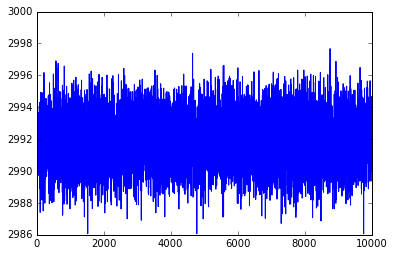

In [49]:
plt.plot(alphas)
plt.plot

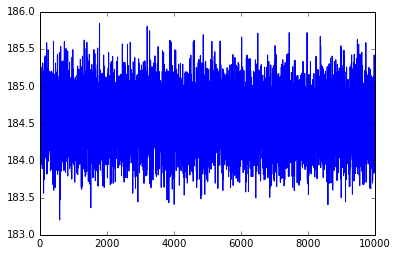

In [50]:
plt.plot(betas)

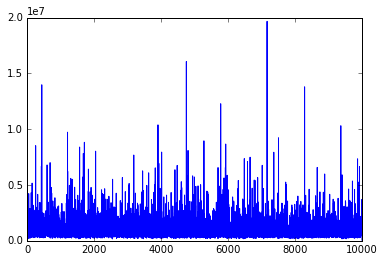

In [51]:
plt.plot( sigmas)

In [52]:
# model 2

n = 10
c = 2
######

estimates = np.ones(n+1)
ts = np.ones(n+1)


t = (1/n)**c


gammas = np.ones(sample_iter)
deltas = np.ones(sample_iter)
taus = np.ones(sample_iter)


gammas[0] = 3000
deltas[0] = 185
taus[0] = 90000

for j in range(sample_iter - 1):

    location_alpha = (sigma_alpha*t*sum4(deltas[-1]) + taus[-1]*mu_alpha) / (sigma_alpha * N*t + taus[-1])
    scale_alpha = np.sqrt((sigma_alpha * taus[-1]) / (sigma_alpha * N*t + taus[-1]))
    r = norm.rvs(loc = location_alpha, scale = scale_alpha)
    gammas[j+1] = r

    location_beta = (sigma_beta * t * sum5(gammas[-1]) + taus[-1] * mu_beta) / (sigma_beta *t* var2*N + taus[-1])
    scale_beta = np.sqrt((taus[-1] * sigma_beta) / (sigma_beta *t* var2*N + taus[-1]))
    q = norm.rvs(loc = location_beta, scale = scale_beta)
    deltas[j+1] = q

    shape = N*t/2 + a
    invrate = 2*b / (b*t*sum6(gammas[-1], deltas[-1]) + 2)
    s = invgamma.rvs(a = shape, scale = 1/ invrate)
    taus[j+1] = s

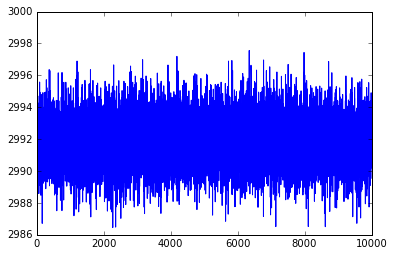

In [53]:
plt.plot(gammas)

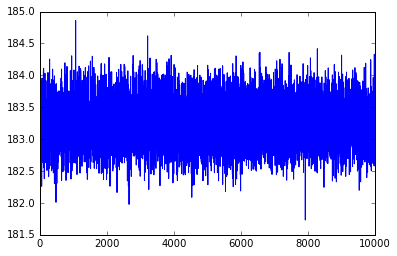

In [54]:
plt.plot(deltas)

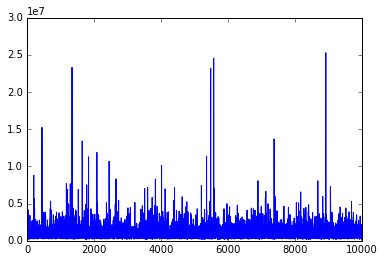

In [55]:
plt.plot(taus)

# computing BF


model1 marginal likelihood by power posterior

In [ ]:
if __name__ == '__main__':
    w = Pool(core) 
    result1 = w.map(function1, range(m))

In [41]:
result1

[array([-729.30539398, -354.16002793, -333.56743702, -313.57779105,
        -308.62096954, -308.00900744, -306.76559049, -305.50959029,
        -305.38252705, -305.08649181, -304.84053711]),
 array([-729.30539398, -354.16002793, -333.56743702, -313.57779105,
        -308.62096954, -308.00900744, -306.76559049, -305.50959029,
        -305.38252705, -305.08649181, -304.84053711]),
 array([-734.88515289, -354.39165004, -322.6314644 , -323.99222733,
        -310.6943874 , -307.54549063, -306.34954208, -306.1750873 ,
        -305.61211767, -304.96230411, -304.53781038]),
 array([-734.88515289, -354.39165004, -322.6314644 , -323.99222733,
        -310.6943874 , -307.54549063, -306.34954208, -306.1750873 ,
        -305.61211767, -304.96230411, -304.53781038]),
 array([-729.82144257, -354.48482228, -315.5490261 , -318.09906184,
        -313.0891305 , -311.44118326, -306.7276752 , -305.52518869,
        -305.29826782, -305.18396816, -304.89336327]),
 array([-729.82144257, -354.48482228, -315.54

In [42]:
expect1 = np.ones(10)
for i in range(10):
    expect1[i] = integral(result1[i], ts)

In [43]:
expect1

array([-310.69750816, -310.69750816, -311.06585386, -311.06585386,
       -310.96451125, -310.96451125, -311.06450194, -311.06450194,
       -311.83371683, -311.83371683])

model2 marginal likelihood by power posterior

In [44]:
if __name__ == '__main__':
    result2 = w.map(function2, range(m))

In [34]:
expect2 = np.ones(10)
for i in range(10):
    expect2[i] = integral(result2[i], ts)

In [35]:
expect2

array([-370.79610807, -370.82285276, -370.91023358, -370.81029433,
       -370.89355506, -370.79966992, -370.82121729, -370.81175071,
       -370.87364834, -370.88498221])

BF21

In [36]:
bf_21 = []
for a,b in zip(expect1, expect2):
    bf_21.append(np.exp(b-a))

In [37]:
bf_21

[1.3534641002483616,
 1.230325843554398,
 1.1405230536714417,
 1.1695334328080635,
 1.1398188429918694,
 1.3797054096250714,
 1.2258493425854882,
 1.2608966991274577,
 1.1509356529951738,
 1.1061856593771091]